In [63]:
from unittest.mock import inplace

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer

# from Practice import categorical_features

In [64]:
import category_encoders as ce

In [65]:
from sklearn.preprocessing import (MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer,OneHotEncoder, OrdinalEncoder,LabelEncoder,StandardScaler)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
titanic = sns.load_dataset('titanic')
df = titanic[['class', 'sex', 'age', 'fare', 'embarked', 'survived']].copy()

In [67]:
df.dropna(inplace=True)
df.head()

class     sex   age     fare embarked  survived
0  Third    male  22.0   7.2500        S         0
1  First  female  38.0  71.2833        C         1
2  Third  female  26.0   7.9250        S         1
3  First  female  35.0  53.1000        S         1
4  Third    male  35.0   8.0500        S         0

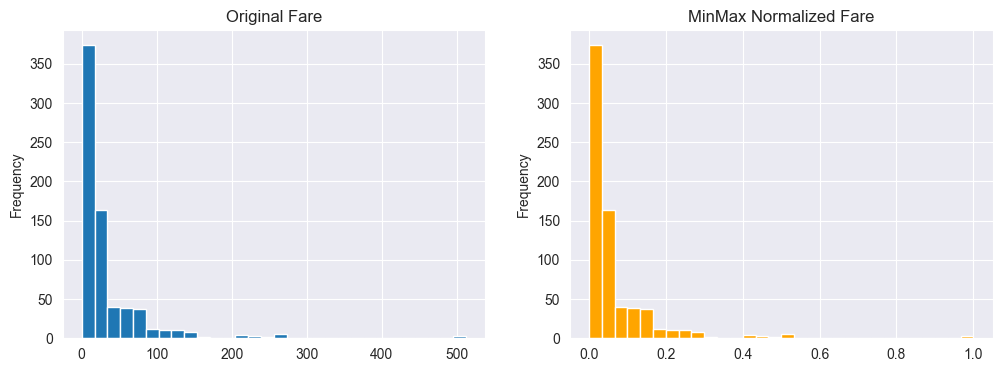

In [68]:
scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[["age","fare"]] = scaler.fit_transform(df[["age","fare"]])

fig, axes = plt.subplots(1, 2, figsize=(12,4))
df["fare"].plot(kind="hist", bins=30, ax=axes[0], title="Original Fare")
df_minmax["fare"].plot(kind="hist", bins=30, ax=axes[1], title="MinMax Normalized Fare", color="orange")
plt.show()

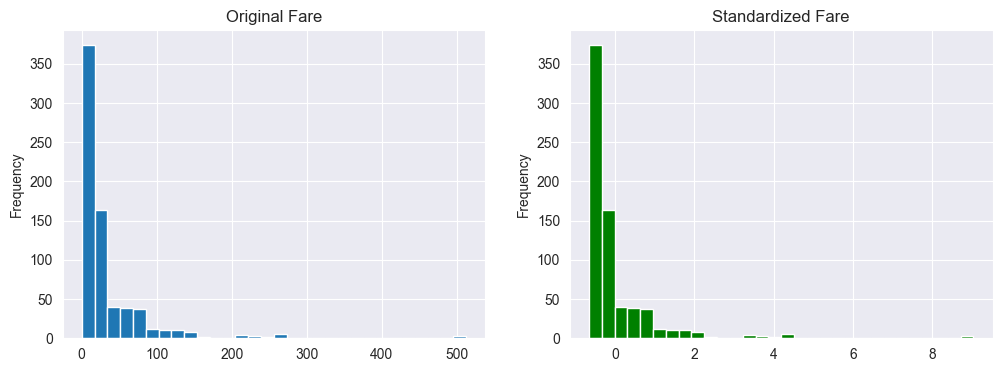

In [69]:
scaler = StandardScaler()
df_standard = df.copy()
df_standard[["age", "fare"]] = scaler.fit_transform(df[["age", "fare"]])

fig, axes = plt.subplots(1, 2, figsize=(12,4))
df["fare"].plot(kind="hist", bins=30, ax=axes[0], title="Original Fare")
df_standard["fare"].plot(kind="hist", bins=30, ax=axes[1], title="Standardized Fare", color="green")
plt.show()

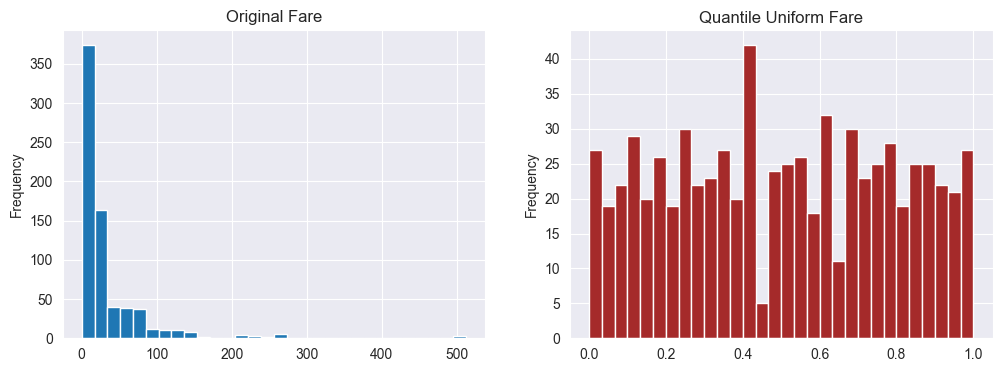

In [70]:
scaleer = QuantileTransformer(output_distribution='uniform',n_quantiles=100)
df_quantile_uniform = df.copy()
df_quantile_uniform[['age', 'fare']] = scaleer.fit_transform(df[["age", "fare"]])

fig, axes = plt.subplots(1, 2, figsize=(12,4))
df["fare"].plot(kind="hist", bins=30, ax=axes[0], title="Original Fare")
df_quantile_uniform["fare"].plot(kind="hist", bins=30, ax=axes[1], title="Quantile Uniform Fare", color="brown")
plt.show()

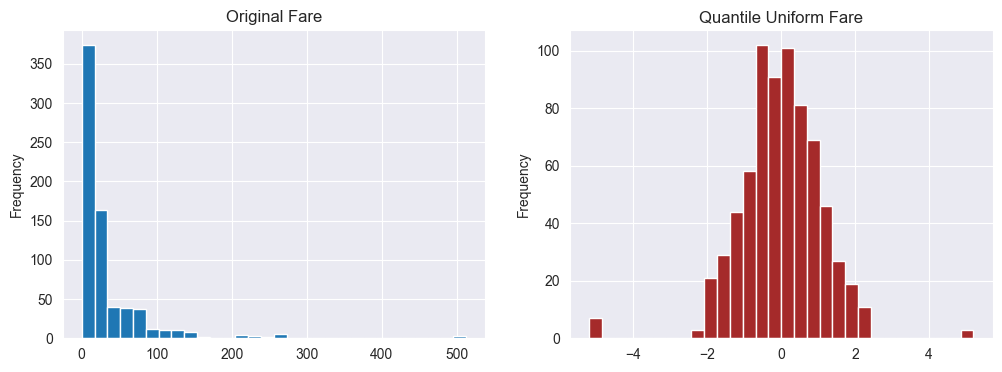

In [71]:
scaleer = QuantileTransformer(output_distribution='normal',n_quantiles=100)
df_quantile_uniform = df.copy()
df_quantile_uniform[['age', 'fare']] = scaleer.fit_transform(df[["age", "fare"]])

fig, axes = plt.subplots(1, 2, figsize=(12,4))
df["fare"].plot(kind="hist", bins=30, ax=axes[0], title="Original Fare")
df_quantile_uniform["fare"].plot(kind="hist", bins=30, ax=axes[1], title="Quantile Uniform Fare", color="brown")
plt.show()

In [72]:
categorical_features = ["sex", "embarked","class"]
le = LabelEncoder()
df_label = df.copy()
for col in categorical_features:
    df_label[col] = le.fit_transform(df_label[col])
    print(df_label)

      class  sex   age     fare embarked  survived
0     Third    1  22.0   7.2500        S         0
1     First    0  38.0  71.2833        C         1
2     Third    0  26.0   7.9250        S         1
3     First    0  35.0  53.1000        S         1
4     Third    1  35.0   8.0500        S         0
..      ...  ...   ...      ...      ...       ...
885   Third    0  39.0  29.1250        Q         0
886  Second    1  27.0  13.0000        S         0
887   First    0  19.0  30.0000        S         1
889   First    1  26.0  30.0000        C         1
890   Third    1  32.0   7.7500        Q         0

[712 rows x 6 columns]
      class  sex   age     fare  embarked  survived
0     Third    1  22.0   7.2500         2         0
1     First    0  38.0  71.2833         0         1
2     Third    0  26.0   7.9250         2         1
3     First    0  35.0  53.1000         2         1
4     Third    1  35.0   8.0500         2         0
..      ...  ...   ...      ...       ...       ...


In [73]:
df_onehot = pd.get_dummies(df,columns=categorical_features,drop_first=True)
print("One-Hot Encoding:\n", df_onehot.head(), "\n")

One-Hot Encoding:
     age     fare  survived  sex_male  embarked_Q  embarked_S  class_Second  \
0  22.0   7.2500         0      True       False        True         False   
1  38.0  71.2833         1     False       False       False         False   
2  26.0   7.9250         1     False       False        True         False   
3  35.0  53.1000         1     False       False        True         False   
4  35.0   8.0500         0      True       False        True         False   

   class_Third  
0         True  
1        False  
2         True  
3        False  
4         True   



In [74]:
ord_enc = OrdinalEncoder(categories=[["Third", "Second", "First"]])
df_ord = df.copy()
df_ord["class"] = ord_enc.fit_transform(df[["class"]])
print("Ordinal Encoding:\n", df_ord[["class"]], "\n")


Ordinal Encoding:
      class
0      0.0
1      2.0
2      0.0
3      2.0
4      0.0
..     ...
885    0.0
886    1.0
887    2.0
889    2.0
890    0.0

[712 rows x 1 columns] 



In [75]:
encoder_target = ce.TargetEncoder(cols='embarked')
df_target = encoder_target.fit_transform(df[["embarked"]],df[["survived"]])
print("Target Encoding:\n", df_target, "\n")

Target Encoding:
      embarked
0    0.362816
1    0.607689
2    0.362816
3    0.362816
4    0.362816
..        ...
885  0.322539
886  0.362816
887  0.362816
889  0.607689
890  0.322539

[712 rows x 1 columns] 



In [76]:
encoder = ce.BinaryEncoder(cols=["embarked"])
df_binary = encoder.fit_transform(df[["embarked"]])

print("Original values:\n", df["embarked"].unique())
print("\nAfter Binary Encoding:\n", df_binary)

Original values:
 ['S' 'C' 'Q']

After Binary Encoding:
      embarked_0  embarked_1
0             0           1
1             1           0
2             0           1
3             0           1
4             0           1
..          ...         ...
885           1           1
886           0           1
887           0           1
889           1           0
890           1           1

[712 rows x 2 columns]
